## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [1]:
# to handle data in dataframes
import pandas as pd

# numeric library
import numpy as np

# To enable plotting graphs 
%matplotlib inline
# plotting library 
import matplotlib.pyplot as plt

#for statistical plots 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import model_selection

# library for linear regression and logistic regression
from sklearn.linear_model import LinearRegression, LogisticRegression


# To encode the categorical and numeric data respectively
from sklearn.preprocessing import LabelEncoder, StandardScaler

# to break the X and y dataframes into training set and test set. 
from sklearn.model_selection import train_test_split

# to calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### 2. Load the dataset and display a sample of five rows of the data frame.

In [3]:
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [4]:
df.shape

(319795, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


###  Inferences based on the above information. 
1. there are **319795** records in the given Data.
    
2. 'mean' (the average value) gives an idea of the central tendency of the data.
    
3. 'std' (standard deviation) indicates the amount of variability or dispersion in the data. Here **'Sleep data'** has the lowest variability.

4. The 'min' and 'max' values provide the range of values found in each column.
- **BMI** values are between **12.02** to **94.85**
- **PhysicalHealth** values are between **0** to **30**
- **MentalHealth** values are between **0** to **30**
- **SleepTime** values are between **1** to **24**
  
5. The quartiles ('25%', '50%', '75%') give insights into the distribution of the data. For example, the 50th percentile (median) represents the value below which 50% of the observations fall.

6. There is an extremely high value of BMI and SleepTime


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [7]:
Percentage_missingValues = (df.isnull().sum())*100/len(df)
Percentage_missingValues

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

- There is no missing values

In [8]:
#As there is no missing values so no need to drop it but suppose if there are missing values then we can do this

#df.dropna(inplace= True)

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [9]:
print(df.shape)

# duplicate values present in data before dropping duplicates
total_duplicates = df.duplicated().sum()

print( "Total Duplicate values : ", total_duplicates)

(319795, 18)
Total Duplicate values :  18078


- There are 18078 dublicated values.

In [10]:
df.drop_duplicates(inplace=True)

# duplicate values present in data after dropping duplicates
total_duplicates = df.duplicated().sum()

print("After dropping duplicate values shape of the Dataframe : ",  df.shape)

After dropping duplicate values shape of the Dataframe :  (301717, 18)


### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

In [11]:
# Count the occurrences of each unique value in the 'HeartDisease' column
target_counts = df[['HeartDisease']].value_counts()
print(target_counts)
print("~"*30)

# Calculate the percentage distribution of the target variable [Normalization = (target_counts / len(df)) * 100]
target_distribution = df[['HeartDisease']].value_counts(normalize=True)*100

# Print the distribution of the target variable
print("In percentage :\n", target_distribution)


HeartDisease
No              274456
Yes              27261
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In percentage :
 HeartDisease
No              90.964712
Yes              9.035288
dtype: float64


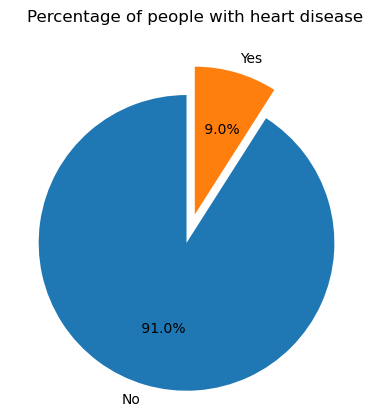

In [12]:
plt.pie(x=df["HeartDisease"].value_counts(),labels=df["HeartDisease"].unique(),autopct="% 1.1f%%",startangle=90, explode = [0.2, 0])
plt.title("Percentage of people with heart disease")
plt.show()

- above pie chart shows that Most people are reported negative for a heart disease.
- Only 9% people have Heart Disease

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

- 'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer' have values as **"Yes"** or **"No"**

- 'AgeCategory', 'Race', 'Diabetic', 'GenHealth' have **unique** values other than "Yes" or "No"

In [13]:
categorical_dt = df.select_dtypes(include='O')
categorical_dt.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

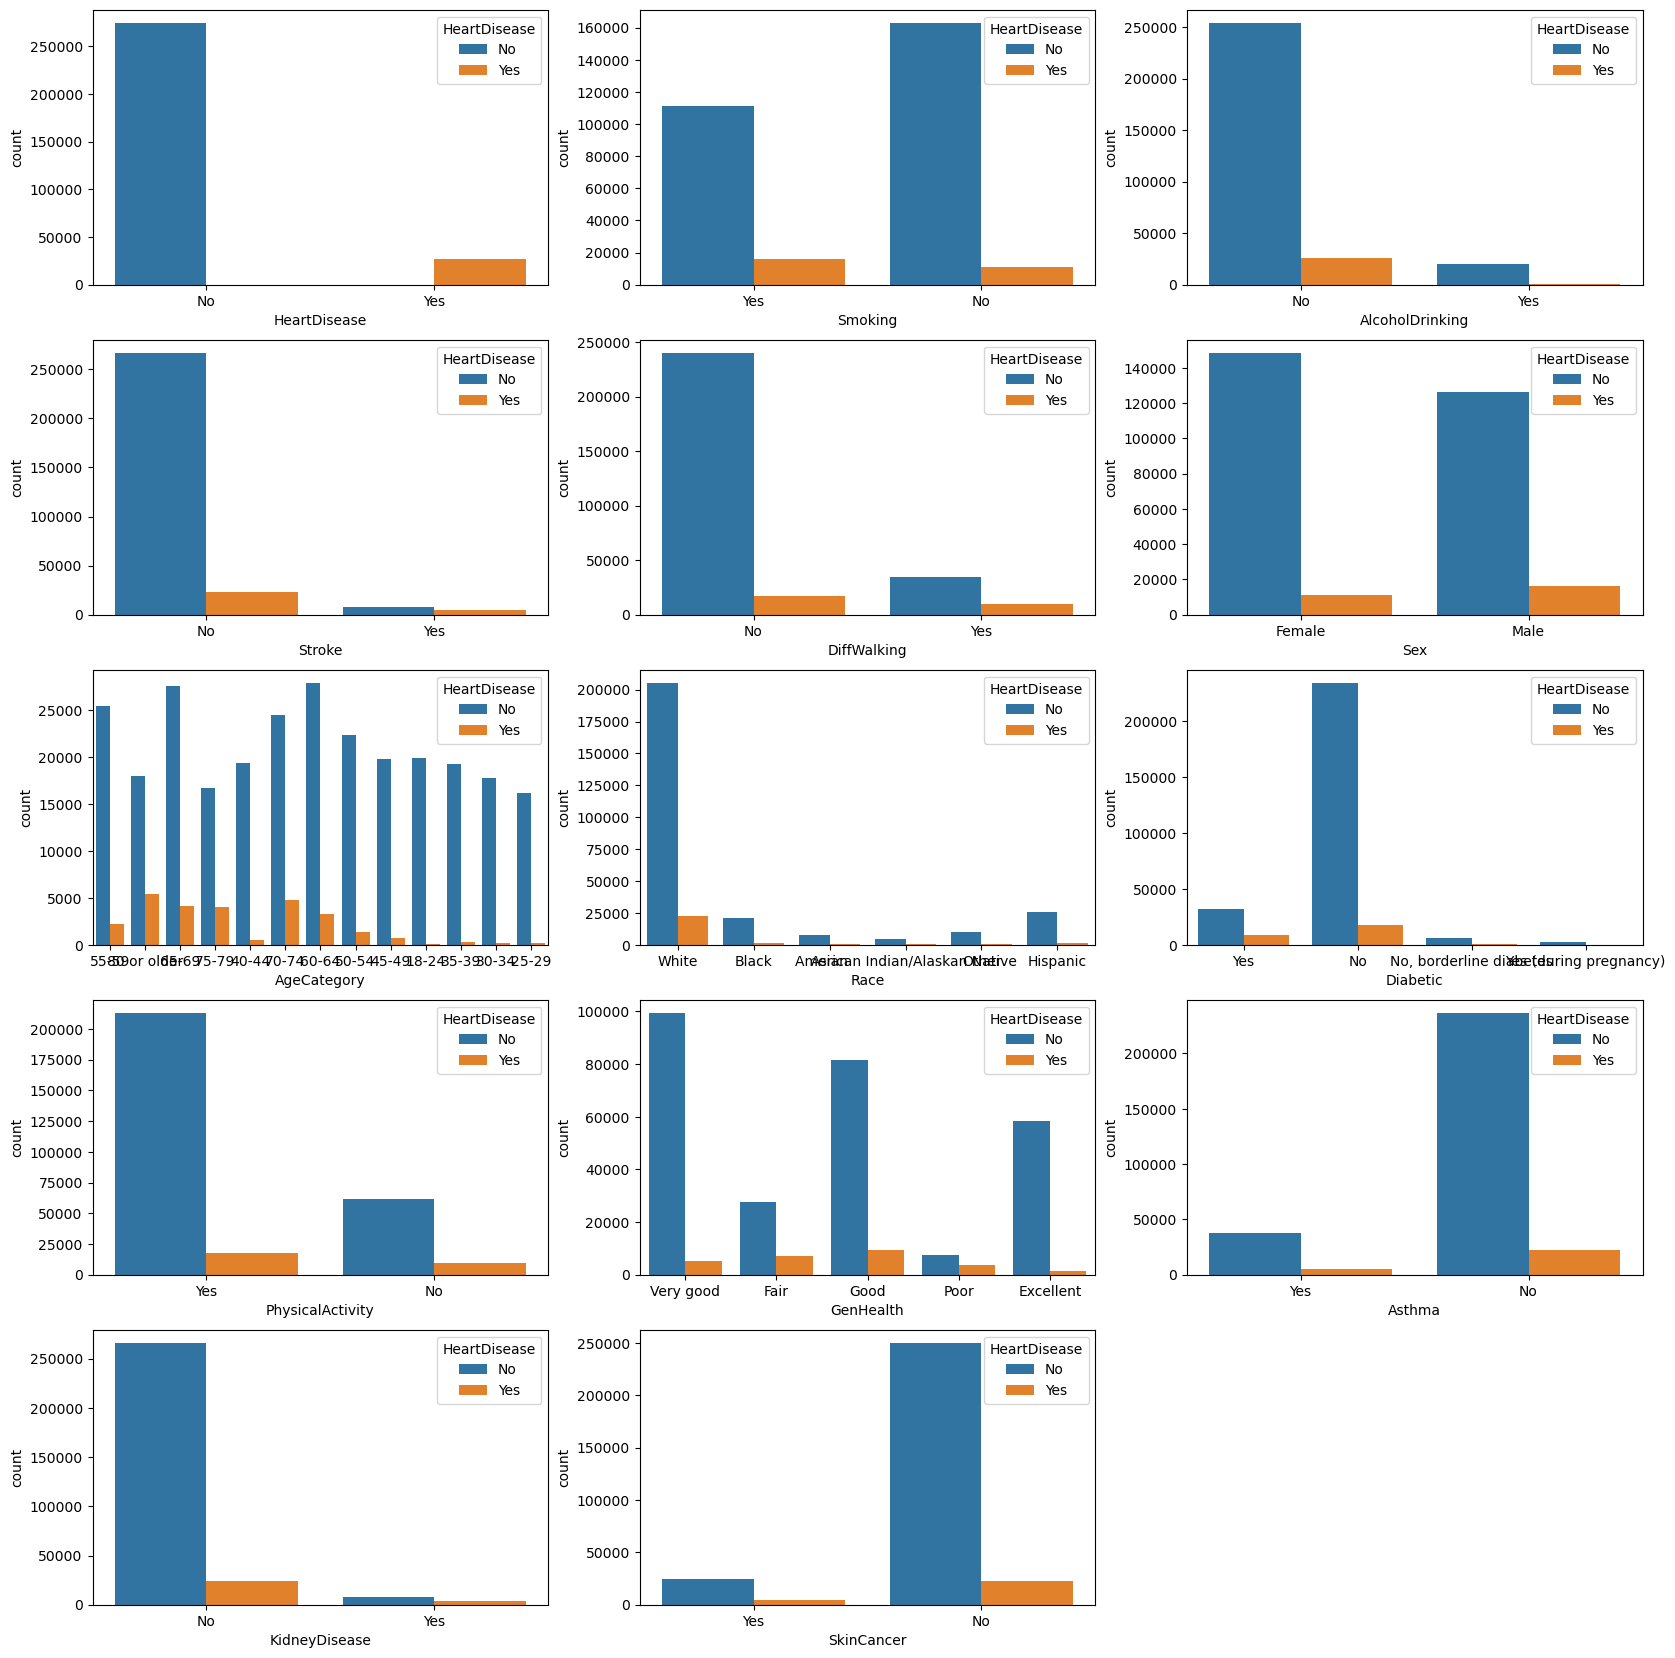

In [14]:
plt.figure(figsize=(20,25))
for i,col in enumerate(categorical_dt):
    plt.subplot(6,3,i+1)
    sns.countplot(x=col,hue='HeartDisease',data=df)

- According to the above representation
    - Smokers are more likely to develop Heart Disease.
    - Most people do not consume alcohol. The data shows that alcohol does not affect human heart.
    - most people didn't have any stroke.
    - Less people face walking difficulties but most of them also have heart problems.
    - most people with heart disease are good at physical activity.
    - Asthma, Kidney Disease, skin cancer, general health and diabetes are not causing heart disease.
    - Males are diagnosed with heart disease more than female. 
    - Old people are more likely to have heart disease.
    - Though, White peope are more in the dataset, this cannot be a valid conclusion. still the data shows - White people are more likely to have heart disease. 

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [15]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [16]:
df['Diabetic'].replace("Yes (during pregnancy)", "Yes" , inplace=True)
df['Diabetic'].replace("No, borderline diabetes", "No", inplace=True)

print("unique values after replacement ")
df['Diabetic'].unique()

unique values after replacement 


array(['Yes', 'No'], dtype=object)

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [17]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df['HeartDisease'].replace({'No': 0,'Yes':1}, inplace=True)

print("unique values After replacement : ")
df['HeartDisease'].unique()

unique values After replacement : 


array([0, 1], dtype=int64)

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [19]:
selectedColumns = ["AgeCategory", "Race", "GenHealth"]

In [20]:
le = LabelEncoder()

for col in selectedColumns:
    df[col] = le.fit_transform(df[col])

In [21]:
df = pd.get_dummies(df, columns=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 
                            'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'])
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_No,Smoking_Yes,...,Diabetic_No,Diabetic_Yes,PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,0,1,...,0,1,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,12,5,4,7.0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,9,5,1,8.0,0,1,...,0,1,0,1,0,1,1,0,1,0
3,0,24.21,0.0,0.0,11,5,2,6.0,1,0,...,1,0,1,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,4,5,4,8.0,1,0,...,1,0,0,1,1,0,1,0,1,0


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [22]:
#Select Features
X = df.drop(columns =['HeartDisease'], axis = 1)

#Select Target 
y = df['HeartDisease']

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [23]:
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [24]:
print('Shape of training (X) data :', x_train.shape)
print('Shape of testing  (X) data :', x_test.shape)
print('Shape of training (Y) data :', y_train.shape)
print('Shape of testing  (Y) data :', y_test.shape)

Shape of training (X) data : (211201, 27)
Shape of testing  (X) data : (90516, 27)
Shape of training (Y) data : (211201,)
Shape of testing  (Y) data : (90516,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [25]:
scaler = StandardScaler()

In [26]:
x_train.iloc[:,:7] = scaler.fit_transform(x_train.iloc[:,:7])
x_test.iloc[:,:7] = scaler.transform(x_test.iloc[:,:7])

In [27]:
pd.DataFrame(x_train)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,...,Diabetic_No,Diabetic_Yes,PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
188627,-0.516354,-0.439337,-0.507179,1.251880,0.512361,-1.469684,-0.057969,1,0,1,...,1,0,0,1,1,0,1,0,0,1
301971,2.203127,-0.439337,0.724062,0.694199,0.512361,-0.146465,0.623187,1,0,1,...,1,0,0,1,1,0,1,0,1,0
203082,0.842614,-0.439337,-0.507179,-0.700004,-1.920700,-1.469684,-0.739125,1,0,1,...,1,0,1,0,0,1,1,0,1,0
156541,-0.861120,1.279882,-0.260931,0.973039,0.512361,-0.808075,0.623187,0,1,1,...,0,1,1,0,0,1,1,0,1,0
88990,-0.401947,-0.193735,-0.260931,-0.421163,0.512361,-0.146465,0.623187,0,1,1,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21534,-0.412769,-0.439337,1.216559,-1.257685,0.512361,1.176754,-0.739125,0,1,1,...,1,0,1,0,1,0,1,0,1,0
120626,-0.629215,-0.439337,-0.507179,-1.257685,-1.920700,-1.469684,3.347812,1,0,1,...,1,0,0,1,1,0,1,0,1,0
74404,-0.316915,-0.439337,0.600938,-0.700004,0.512361,1.176754,-0.057969,1,0,1,...,1,0,0,1,0,1,1,0,1,0
282245,-0.924508,-0.439337,3.186546,0.415358,0.512361,1.176754,-0.057969,1,0,1,...,1,0,0,1,1,0,1,0,1,0


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [28]:
def fit_predict_model(model, x_train, x_test, y_train, y_test):
    
    # Fits the model with the train data
    model.fit(x_train,y_train)
    
    # Makes predictions on the test set.
    prediction = model.predict(x_test)
    
    # calculates the accuracy
    accuracy = accuracy_score(y_test,prediction)
    
    #Returns the Accuracy Score.
    return accuracy

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

- Logistic regression
- KNN
- Naive Bayes
- Decision tree
- Random Forest
- Adaboost, GradientBoost
- Stacked Classifier 

In [29]:
lr = LogisticRegression()
gnb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf',rf),('knn',knn),('gb',gb),('adb',adb)]
sc = StackingClassifier(estimators=estimators , final_estimator=rf)

In [30]:
r_score = pd.DataFrame(columns=["Accuracy Score"])

for model, model_name in zip([lr, gnb, knn, dt, rf, adb, gb, sc],
                            ['Logistic Regression','Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest',
                            'Ada Boost', 'Gradient Boost', 'Stacked']):
    r_score.loc[model_name] = fit_predict_model(model, x_train, x_test, y_train, y_test)

In [31]:
r_score

,Accuracy Score
Logistic Regression,0.909872
Naive Bayes,0.832770
KNN,0.899399
Decision Tree,0.853827
Random Forest,0.895941
Ada Boost,0.910833
Gradient Boost,0.911209
Stacked,0.905553


### Conclusion

- Logistic Regression : 91%
- K Neighbours Classifier : 90%
- Naive Bayes Classifier : 83%
- Decision Tree Classifier : 85%
- Random Forest Classifier : 90%
- AdaBoost Classifier : 91%
- GradientBoostingClassifier : 91%
- Stacked Classifiers : 91%

- stacked ensemble of power machine learning algorithms is resulted in higher performance.
- Hence Logistic, Adaboost, GradientBoosting and Stacked classifier models are more useful to the further analysis.

----
## Happy Learning:)
----